___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project

In this data project I will focus on exploratory data analysis of stock prices. 
____
I will focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

##

In [50]:
from pandas_datareader import data, wb as pdr
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

I will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [51]:
from datetime import datetime
# importing datetime library
# from 2006 to 2016 
start = datetime(2006,1,1)
end = datetime(2016,1,1)

In [81]:
# data reader allows to extract information in terms of data frames from internet
BAC=data.DataReader('BAC',start='2006, 1, 1', end='2016, 1, 1',data_source='stooq')
# data source is stooq
BAC.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
2015-12-23,14.9130,15.0681,14.8570,15.0681,7.568996e+07
2015-12-22,14.8168,14.8659,14.6420,14.8403,6.463104e+07
2015-12-21,14.7539,14.7981,14.5722,14.7461,7.497599e+07
2015-12-18,14.9386,14.9984,14.5645,14.5645,1.573602e+08


In [82]:
C=data.DataReader('C',start='2006, 1, 1', end='2016, 1, 1',data_source='stooq')
GS=data.DataReader('GS',start='2006, 1, 1', end='2016, 1, 1',data_source='stooq')
JPM=data.DataReader('JPM',start='2006, 1, 1', end='2016, 1, 1',data_source='stooq')
MS=data.DataReader('MS',start='2006, 1, 1', end='2016, 1, 1',data_source='stooq')
WFC=data.DataReader('WFC',start='2006, 1, 1', end='2016, 1, 1',data_source='stooq')

In [86]:
tickers = ["BAC","C","GS","MS","WFC"]
type(tickers[0])

str

In [87]:
#concatonating the tickers into a single data frame 
bank_stocks = pd.concat([BAC,C,GS,MS,WFC], axis = 1, keys = tickers)
bank_stocks.head(5)

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04  38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05  38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06  38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09  38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

                                   
              Close        Volume  
Date                               
2006-01-03  22.9581  1.530724e+07  
2006-01-04  22.6917  1.510382e+07  
2006-01-05  22.6690  1.407726e+07  
2006-01-06  22.7983  1.167705e+07  
2006-01-09  22.7983  7.808415e+06  

[5 rows x 25 columns]

In [88]:
bank_stocks.columns.names = ['tickers','Stock Info']

In [89]:
bank_stocks.head()

tickers         BAC                                                 C  \
Stock Info     Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

tickers                                              ...       MS           \
Stock Info     High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

tickers                                         WFC                    \
Stock Info      Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04  38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05  38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06  38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09  38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

tickers                            
Stock Info    Close        Volume  
Date                               
2006-01-03  22.9581  1.530724e+07  
2006-01-04  22.6917  1.510382e+07  
2006-01-05  22.6690  1.407726e+07  
2006-01-06  22.7983  1.167705e+07  
2006-01-09  22.7983  7.808415e+06  

[5 rows x 25 columns]

# EDA


In [90]:
#.xs(key = "close", from level = "Stock Info", axis = 1 by column moving parellely)

bank_stocks.xs(key = "Close" ,level = "Stock Info", axis = 1).max()

tickers
BAC     46.2013
C      466.8120
GS     203.6910
MS      58.5624
WFC     47.0925
dtype: float64

This dataframe, below will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [91]:
# creating an empty data frame 
returns = pd.DataFrame()
returns.head()

""


Below, data frame displays returns for each of the banks from 2006 to 2016

In [92]:
#.pct_change() for the returns in the closing price 
for ticks in tickers:
    returns[ticks+' Return'] = bank_stocks[ticks]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,MS Return,WFC Return
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.010445,0.000000


Starting with data visualization: creating a pair plot first:

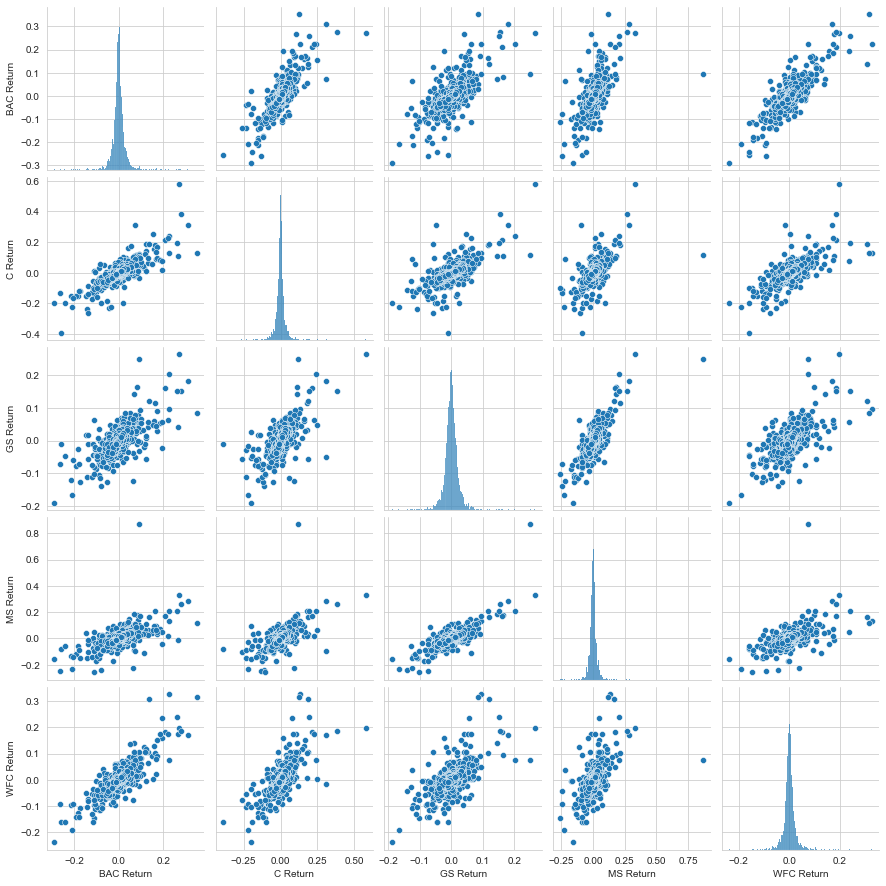

In [93]:
import seaborn as sns
sns.pairplot(data = returns)
# these plots compare the returns with each other 

Displaying the worst and largest performing days for each of the banks

In [71]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [94]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Standard deviation of the returns shows that the citi bank stock would classify as the riskiest over the entire time period

In [73]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [100]:
##

____
# More Visualization


### Imports

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Creating a line plot showing Close price for each bank for the entire index of time. 

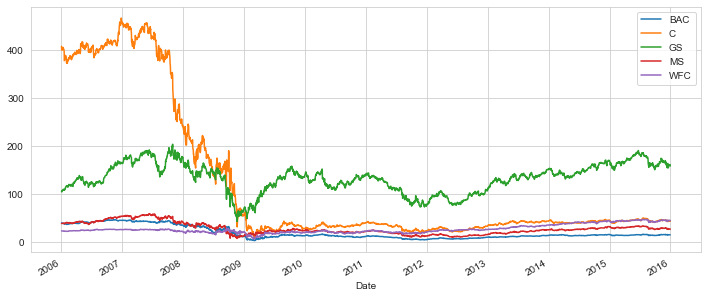

In [102]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,5),label=tick)
plt.legend()

In [104]:
# I will also make a similar interactive plot using plotly

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

C:\Users\varun\AppData\Local\Temp\ipykernel_21944\3319282696.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\varun\AppData\Local\Temp\ipykernel_21944\3319282696.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



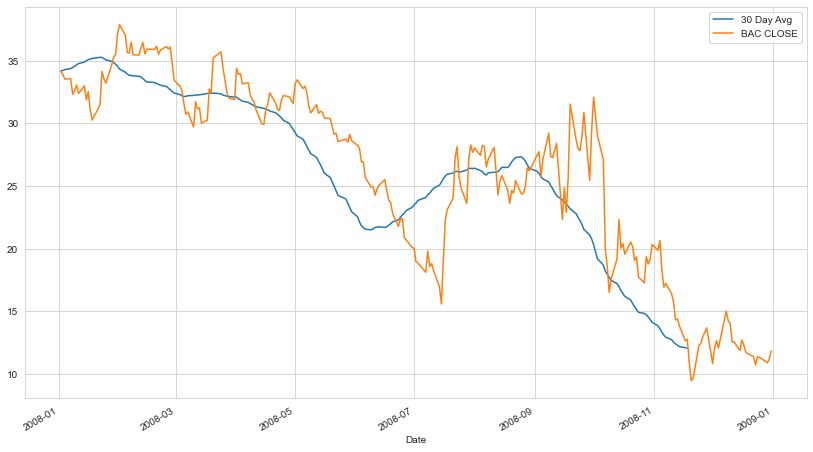

In [107]:
plt.figure(figsize=(14,8))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='tickers', ylabel='tickers'>

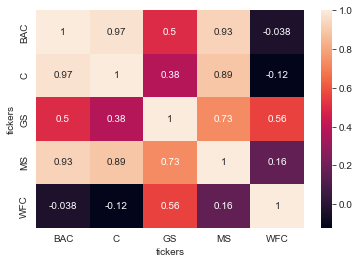

In [108]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Using seaborn's clustermap to cluster the correlations together

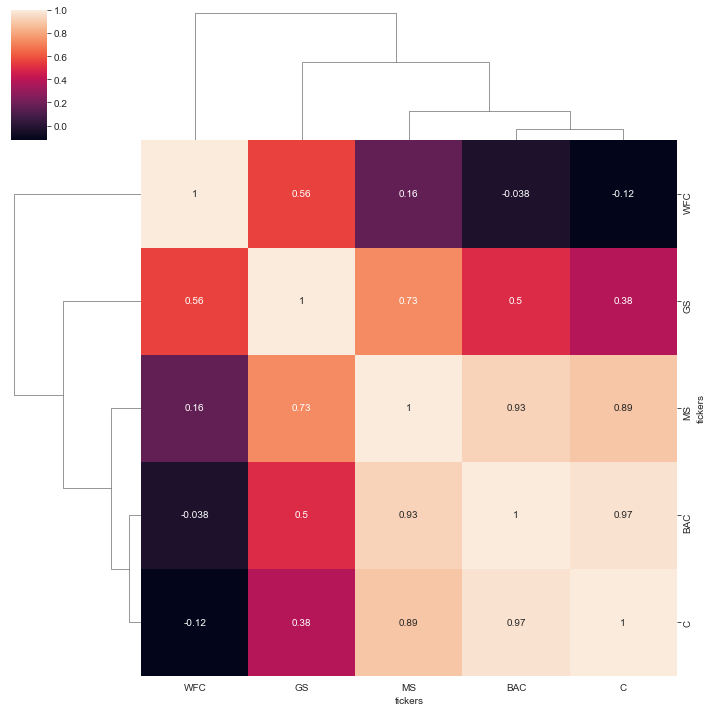

In [109]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [110]:
##

# Part 2 

In this second part of the project I will rely on the cufflinks library to create some Technical Analysis plots.

Using iplot to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [111]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

C:\Users\varun\AppData\Local\Temp\ipykernel_21944\2707617483.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [113]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

C:\Users\varun\AppData\Local\Temp\ipykernel_21944\2467045757.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [112]:
# the bollinger band plot is a plot that takes into consideration the standard deviation and plots an upper and lower band 
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\varun\AppData\Local\Temp\ipykernel_21944\3850420300.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

